# Gradient Boosting Machine (GBM) model. 

GBM is a powerful and versatile machine learning algorithm that has proven to be effective in various prediction tasks. Some advantages of this model include:

- High Predictive Accuracy: GBM excels in capturing complex patterns and interactions in data, making it well-suited for predicting student performance. It combines multiple weak prediction models (decision trees) and iteratively improves them to minimize prediction errors, resulting in a highly accurate ensemble model.

- Handles Different Types of Variables: GBM can handle a mix of categorical and numerical variables, which is often the case in student performance prediction. It can automatically handle feature interactions, non-linear relationships, and missing data, reducing the need for extensive data preprocessing.

- Robust to Outliers and Noise: GBM is less affected by outliers and noisy data compared to some other algorithms. It achieves this robustness by using decision trees and ensemble methods, which reduce the impact of individual instances.

- Interpretability: While GBM models are not as inherently interpretable as linear regression, they can provide insights into feature importance. You can examine the contribution of different variables to the predictions, which can help identify factors influencing student performance.

- Flexible Hyperparameter Tuning: GBM models offer various hyperparameters that can be tuned to optimize performance. This flexibility allows you to fine-tune the model based on the specific characteristics of your student performance prediction task.

# Portuguese

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 60)

por = pd.read_csv('output/encoded_por.csv')
por.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,score,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,7.33,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,10.33,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12.33,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14.00,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,12.33,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


## Train-test split

In [4]:
from sklearn.model_selection import train_test_split

y = por['score']
X = por.drop(['score'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 30)

In [5]:
print('Sample sizes\n')
print('Training set')
print('   predicted (y) \t', y_train.shape)
print('   predictors (X) \t', X_train.shape, '\n')
print('Validation set')
print('   predicted (y) \t', y_test.shape)
print('   predictors (X) \t', X_test.shape, '\n')

Sample sizes

Training set
   predicted (y) 	 (519,)
   predictors (X) 	 (519, 48) 

Validation set
   predicted (y) 	 (130,)
   predictors (X) 	 (130, 48) 



## Models

### Basic Gradient Boosting and Random Forest

In [182]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate = 0.05)
model.fit(X_train, y_train)
print('Gradient Boosting Score  %0f' % model.score(X_test, y_test))


from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)
print('Random Forest Score \t %0f' % RFmodel.score(X_test, y_test))

Gradient Boosting Score  0.400673
Random Forest Score 	 0.316380


### Retrieving statistically significant variables:

In [183]:
import statsmodels.api as sm

linear = sm.OLS(endog = por['score'], exog = por.drop('score', axis = 1))
results = linear.fit()
summary = results.summary()

results_as_html = summary.tables[1].as_html()
summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
significant_vars = list(summary[summary['P>|t|'] < 0.05].index)
print(significant_vars)

['studytime', 'failures', 'schoolsup', 'higher', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_health', 'Mjob_services', 'Mjob_teacher', 'Fjob_other', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']


### Basic Gradient Boosting and Random Forest with selected significant variables

In [173]:
from sklearn.model_selection import train_test_split

y = por['score']
X = por[significant_vars]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 30)

In [184]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(max_depth=2, learning_rate = 0.05, n_estimators=1000)
model.fit(X_train, y_train)
print('Gradient Boosting Score  %0f' % model.score(X_test, y_test))


Gradient Boosting Score  0.402688


In [185]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()
RFmodel.fit(X_train, y_train)
print('Random Forest Score \t %0f' % RFmodel.score(X_test, y_test))

Random Forest Score 	 0.322403


### Improving Gradient Boosting

In Gradient Boosting models, the two main hyperparameters are the number of estimators, which defines how many branches used to train the model and how deep it is, and the learning rate, which sets the importance of each node. 

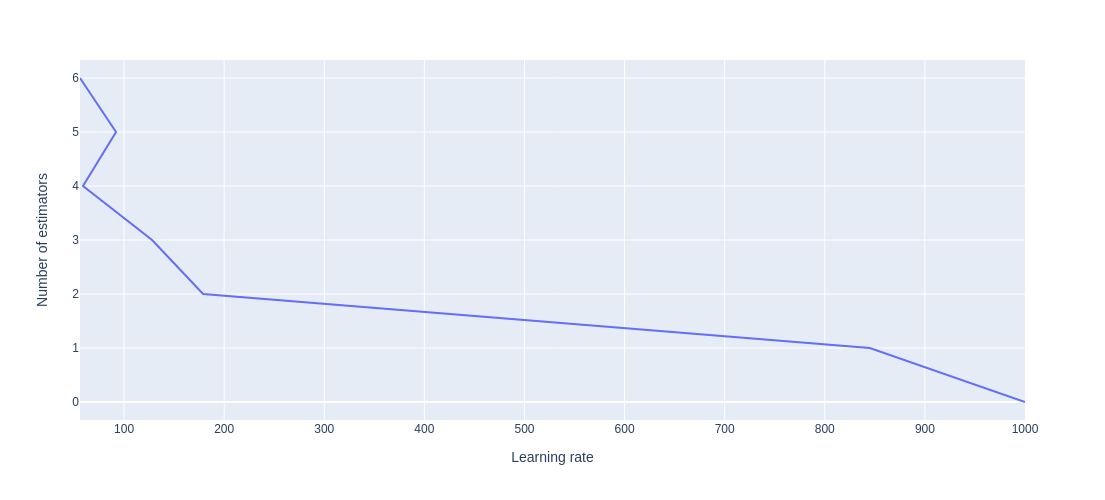

In [275]:
from sklearn.metrics import mean_squared_error
import numpy as np
import plotly.express as px

branches = []
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

for learning_rate in learning_rates:
    model = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]
    best_number_of_estimators = np.argmin(errors)
    branches.append(best_number_of_estimators + 1)

fig = px.line(learning_rates, branches, 
        height = 500, width = 700)
fig.update_layout(xaxis_title = 'Learning rate', 
                  yaxis_title = 'Number of estimators')

As we can see in the graph, there is a trade-off between the number of estimators and the learning rate.

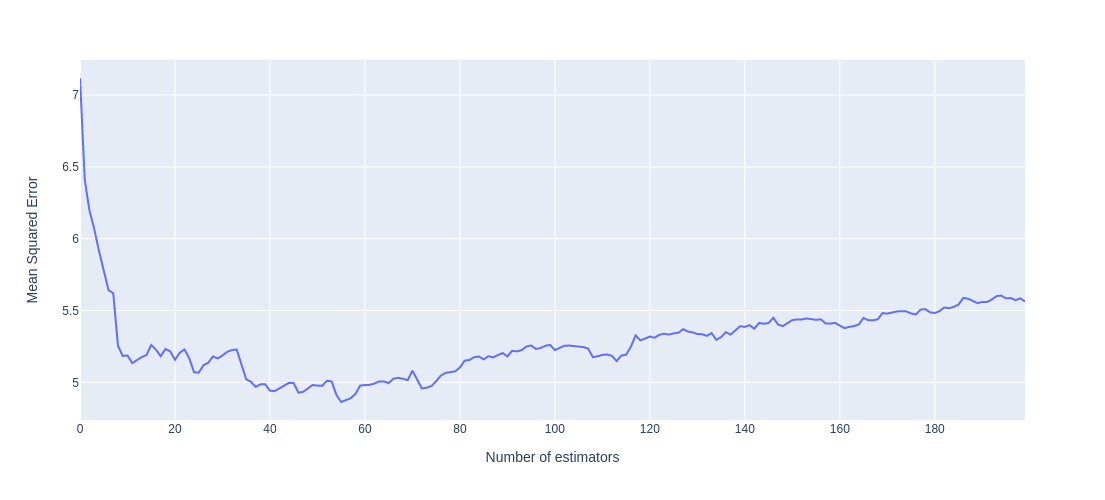

In [282]:
model = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=0.5)
model.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]

fig = px.line(errors[:200], 
        height = 500, width = 900)
fig.update_layout(xaxis_title = 'Number of estimators', 
                  yaxis_title = 'Mean Squared Error', 
                  showlegend = False)

The mean squared error first decreases as the number of estimators is increased; then the error begins rising again after a optimum level. 

In [307]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

scores = []
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rates:
    model = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    scores.append([learning_rate, model.score(X_test, y_test)])

print(pd.DataFrame(scores, columns = ['learning rate', 'score']).to_string(index = False))

 learning rate     score
          0.01  0.390535
          0.05  0.403402
          0.10  0.336189
          0.25  0.241720
          0.50  0.005529
          0.75 -0.187993
          1.00 -0.340114


In [353]:
for leaning_rate in list(np.linspace(0.01, 0.1, num=100)):
    model = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    scores.append([learning_rate, model.score(X_test, y_test)])

scr = pd.DataFrame(scores)
scr_max = scr[1].idxmax()
print('best learning rate: \t', scr.loc[scr_max, 0])

best learning rate: 	 0.05


In [298]:
model = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=0.06)
model.fit(X_train, y_train)

print('Gradient Boosting Score %0f' % model.score(X_test, y_test))

Gradient Boosting Score 0.410627


### Grid Search 

Instead of tuning the model's hyperparemeters manually, one can use Grid Search methods to find the best combination of parameters. 

In [371]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

param_grid = {
    'max_depth': [1, 2, 3, 5, 7],
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.06, 0.1, 0.5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best parameter combination
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.06, 'max_depth': 1, 'n_estimators': 200}


In [372]:
model = GradientBoostingRegressor(max_depth=1, n_estimators=200, learning_rate=0.06)
model.fit(X_train, y_train)

print('Gradient Boosting Score %0f' % model.score(X_test, y_test))

Gradient Boosting Score 0.340752
